In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
import torch
import matplotlib.pyplot as plt
import numpy as np
import random
from src.dataset import get_dataloaders

In [3]:
train_loader, val_loader, test_loader, class_names = get_dataloaders(batch_size=64)
print("Classes:", class_names)

100%|████████████████████████████████████████| 170M/170M [00:05<00:00, 31.1MB/s]


Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


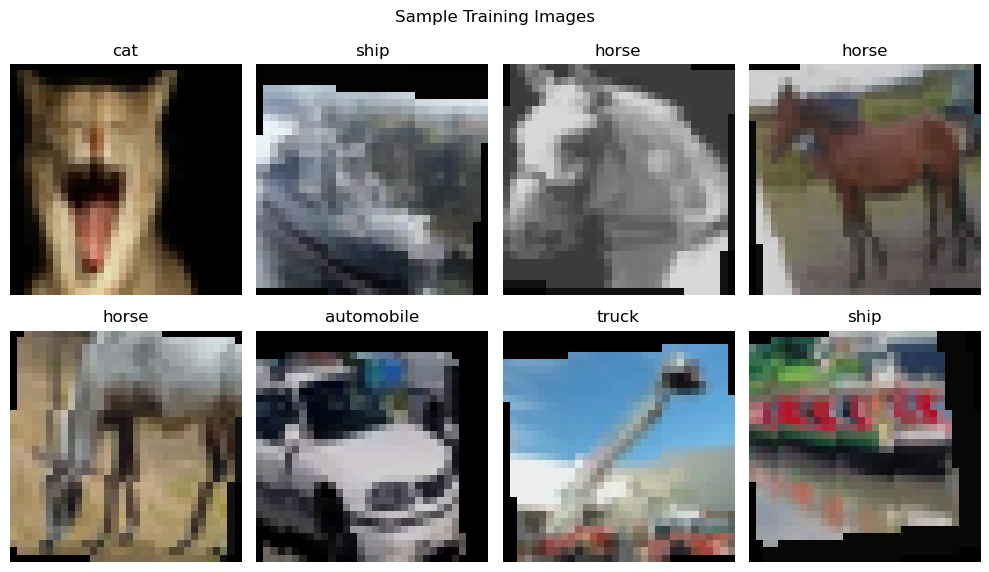

In [5]:
def imshow(img_tensor):
    img = img_tensor.numpy().transpose((1, 2, 0))
    mean = np.array([0.4914, 0.4822, 0.4465])
    std = np.array([0.2023, 0.1994, 0.2010])
    img = std * img + mean  # unnormalize
    img = np.clip(img, 0, 1)
    return img

images, labels = next(iter(train_loader))
plt.figure(figsize=(10, 6))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(imshow(images[i]))
    plt.title(class_names[labels[i]])
    plt.axis('off')
plt.suptitle("Sample Training Images")
plt.tight_layout()
plt.show()

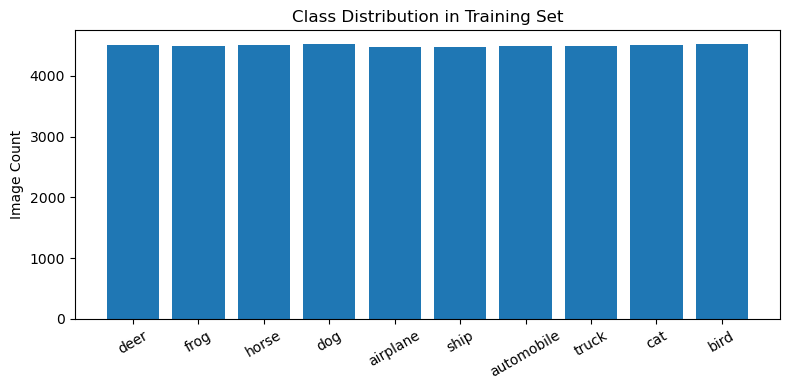

In [7]:
from collections import Counter

label_list = [label for _, label in train_loader.dataset]

counts = Counter(label_list)
plt.figure(figsize=(8, 4))
plt.bar([class_names[k] for k in counts.keys()], counts.values())
plt.title("Class Distribution in Training Set")
plt.ylabel("Image Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [8]:
img, label = train_loader.dataset[0]
print(f"Image shape: {img.shape}")
print(f"Image dtype: {img.dtype}")
print(f"Label: {label} -> {class_names[label]}")

Image shape: torch.Size([3, 32, 32])
Image dtype: torch.float32
Label: 4 -> deer


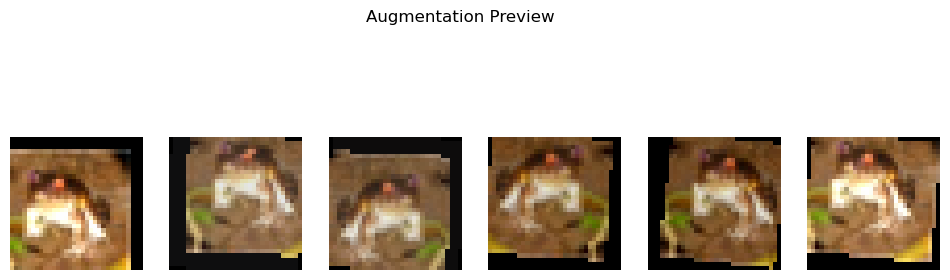

In [9]:
augmented_imgs = [train_loader.dataset.dataset[0][0] for _ in range(6)]  # access base dataset

plt.figure(figsize=(12, 4))
for i, img_tensor in enumerate(augmented_imgs):
    plt.subplot(1, 6, i+1)
    plt.imshow(imshow(img_tensor))
    plt.axis('off')
plt.suptitle("Augmentation Preview")
plt.show()
